In [1]:
cd /Users/abrahamflamholz/Documents/workspace/tecantaloupe

/Users/abrahamflamholz/Documents/workspace/tecantaloupe


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn
import itertools

from growth.plate_spec import PlateSpec
from growth.plate_time_course_parser import SavageLabM1000Excel
from matplotlib import pyplot as plt

In [3]:
# PlateSpec defined in CSV for easy editing
ps = PlateSpec.FromFile('growth/plate_specs/growth_example.csv')
name_mapping = ps.well_to_name_mapping()

# PlateSpec contains a DataFrame with the mapping. 
ps.df

value_type  name                                                              \
column         1     2     3     4     5     6              7              8   
A            JB9   JB9   JB9   JB9   JB9   JB9   JB9 + aTc100   JB9 + aTc100   
B           JB11  JB11  JB11  JB11  JB11  JB11  JB11 + aTc100  JB11 + aTc100   
C           JB12  JB12  JB12  JB12  JB12  JB12  JB12 + aTc100  JB12 + aTc100   
D           JB14  JB14  JB14  JB14  JB14  JB14  JB14 + aTc100  JB14 + aTc100   
E            JB3   JB3   JB3   JB3   JB3   JB3   JB3 + aTc100   JB3 + aTc100   
F            JB5   JB5   JB5   JB5   JB5   JB5   JB5 + aTc100   JB5 + aTc100   
G            JB6   JB6   JB6   JB6   JB6   JB6   JB6 + aTc100   JB6 + aTc100   
H            JB8   JB8   JB8   JB8   JB8   JB8   JB8 + aTc100   JB8 + aTc100   

value_type                                                              
column                  9             10             11             12  
A            JB9 + aTc100   JB9 + aTc100   JB9 + aTc100   JB9 + aTc100  
B           JB11 + aTc100  JB11 + aTc100  JB11 + aTc100  JB11 + aTc100  
C           JB12 + aTc100  JB12 + aTc100  JB12 + aTc100  JB12 + aTc100  
D           JB14 + aTc100  JB14 + aTc100  JB14 + aTc100  JB14 + aTc100  
E            JB3 + aTc100   JB3 + aTc100   JB3 + aTc100   JB3 + aTc100  
F            JB5 + aTc100   JB5 + aTc100   JB5 + aTc100   JB5 + aTc100  
G            JB6 + aTc100   JB6 + aTc100   JB6 + aTc100   JB6 + aTc100  
H            JB8 + aTc100   JB8 + aTc100   JB8 + aTc100   JB8 + aTc100

In [4]:
parser = SavageLabM1000Excel()
timecourse = parser.ParseFromFilename('growth/data/example_growth.xlsx')

# blanks against negative controls, which are in rows D and H.
negs = ['D%d' % i for i in range(1, 9)]
negs += ['H%d' % i for i in range(1, 9)]
blanked = timecourse.blank(blank_wells=negs)
# You can blank each well against it's own early timepoints
# by not setting blank_wells

# Smooth with default params.
smoothed = blanked.smooth()

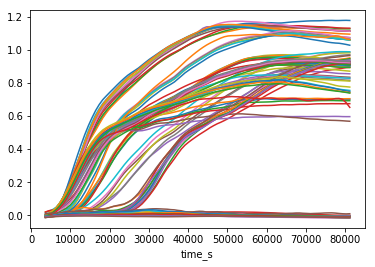

In [5]:
# Smoothed & blanked data.
OD_data = smoothed.data_for_label('abs600')
OD_data.plot(x='time_s', legend=False)


In [6]:
means = smoothed.mean_by_name(ps)
sems = smoothed.sem_by_name(ps)

mean_OD = means.data_for_label('abs600')
sems_OD = sems.data_for_label('abs600')

In [7]:
# groupings of samples for plotting
pos = [c for c in mean_OD.columns
       if c.startswith('JB3') or c.startswith('JB9')]
neg = [c for c in mean_OD.columns
       if c.startswith('JB8') or c.startswith('JB14')]
exp = [c for c in mean_OD.columns
       if c.startswith('JB11') or c.startswith('JB12') or c.startswith('JB5') or c.startswith('JB6')]

print(mean_OD.columns)

Index(['JB11', 'JB11 + aTc100', 'JB12', 'JB12 + aTc100', 'JB14',
       'JB14 + aTc100', 'JB3', 'JB3 + aTc100', 'JB5', 'JB5 + aTc100', 'JB6',
       'JB6 + aTc100', 'JB8', 'JB8 + aTc100', 'JB9', 'JB9 + aTc100', 'time_s'],
      dtype='object', name='label')


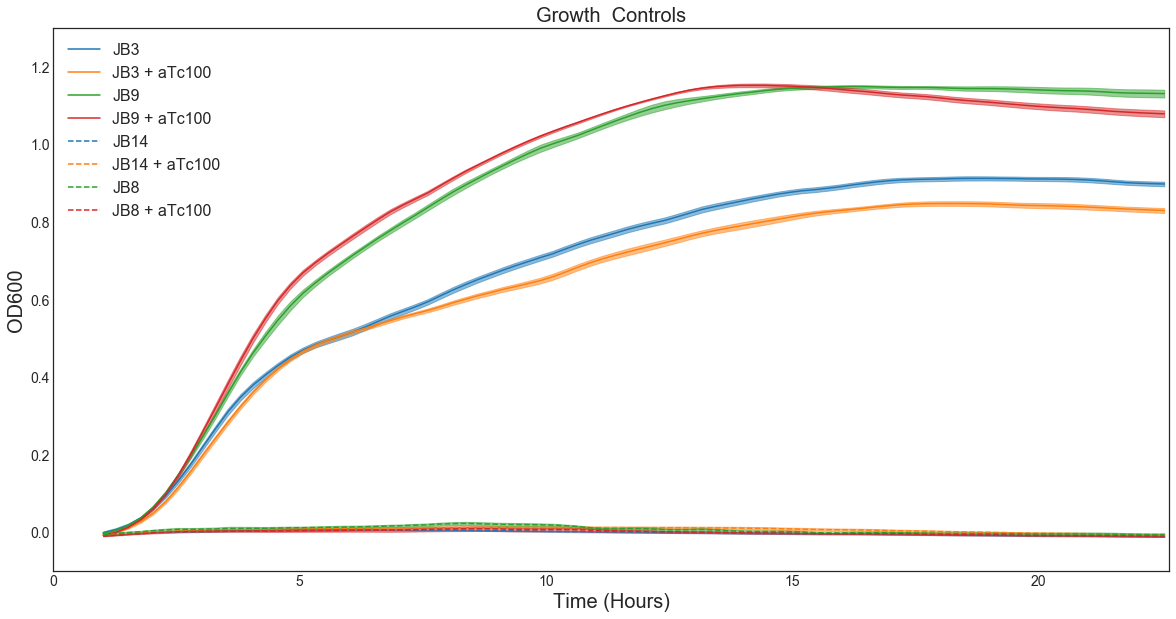

In [8]:
seaborn.set_style('white')
pos_to_plot = pos
exp_to_plot = exp
neg_to_plot = neg

fig = plt.figure(figsize=(20,10))
time_h = mean_OD.time_s / (60.0*60.0)

colors = seaborn.color_palette()
for i, c in enumerate(sorted(pos_to_plot)):
    label = c
    color = colors[i % len(colors)]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color, figure=fig)

for i, c in enumerate(sorted(neg_to_plot)):
    label = c
    color = colors[i % len(colors)]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color, ls='--', figure=fig)
    
plt.legend(loc='best', fontsize=16)
plt.xlim(0, np.max(time_h)+.1)
plt.ylim(-0.1, 1.3)
plt.xticks(np.arange(0, np.max(time_h)+.1, 5), fontsize=14)
plt.yticks(fontsize=14)
plt.title('Growth  Controls', fontsize=20)
plt.xlabel('Time (Hours)', fontsize=20)
plt.ylabel('OD600', fontsize=20)

plt.show()

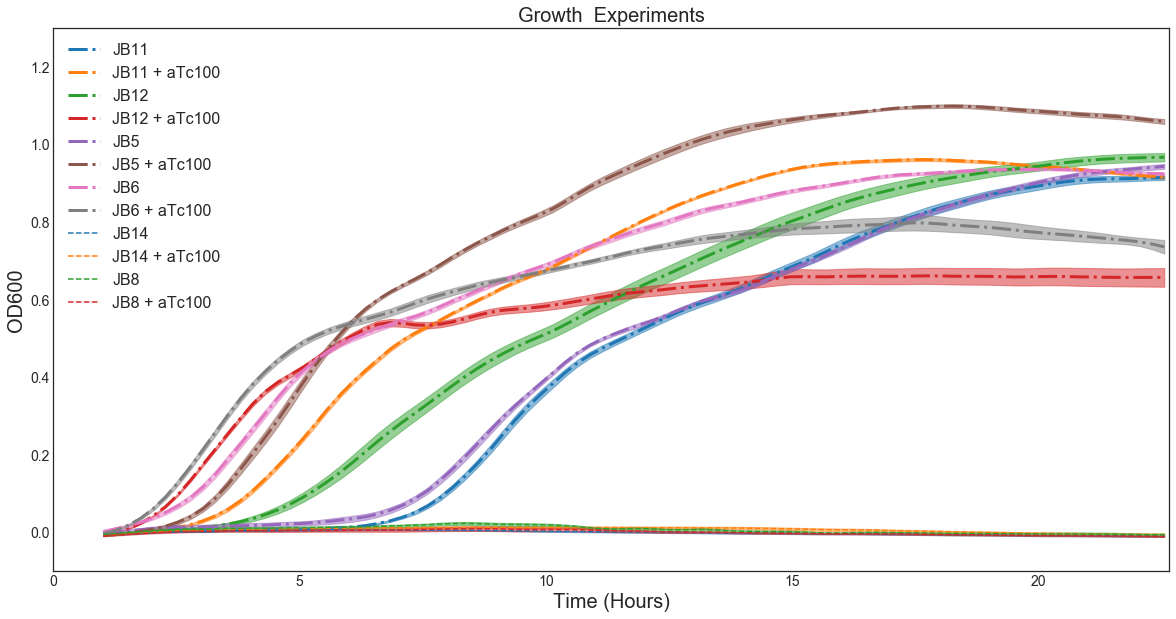

In [9]:
seaborn.set_style('white')
pos_to_plot = pos
exp_to_plot = exp
neg_to_plot = neg

plt.figure(figsize=(20,10))
time_h = mean_OD.time_s / (60.0*60.0)

colors = seaborn.color_palette()
for i, c in enumerate(sorted(exp_to_plot)):
    label = c
    color = colors[i % len(colors)]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color, lw=3, ls='-.')

for i, c in enumerate(sorted(neg_to_plot)):
    label = c
    color = colors[i % len(colors)]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color, ls='--')
    
plt.legend(loc='best', fontsize=16)
plt.xlim(0, np.max(time_h)+.1)
plt.ylim(-0.1, 1.3)
plt.xticks(np.arange(0, np.max(time_h)+.1, 5), fontsize=14)
plt.yticks(fontsize=14)
plt.title('Growth  Experiments', fontsize=20)
plt.xlabel('Time (Hours)', fontsize=20)
plt.ylabel('OD600', fontsize=20)

plt.show()
    

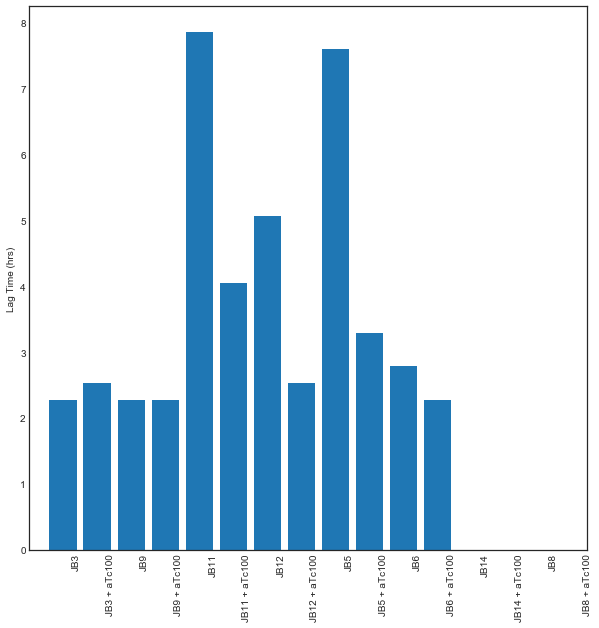

In [10]:
lag_times = means.LagTime(density_label='abs600')

labels = sorted(pos) + sorted(exp) + sorted(neg)
lags = [lag_times[l] for l in labels]

# Note - samples that don't cross the threshold get a 0 lag value.
figure = plt.figure(figsize=(10,10))
xs = np.arange(len(lags))
plt.bar(xs, lags)
plt.ylabel('Lag Time (hrs)')
plt.xticks(xs + 0.4, labels, rotation=90)
plt.show()

/Users/abrahamflamholz/Documents/workspace/tecantaloupe/growth/plate_time_course.py:499: RuntimeWarning: invalid value encountered in log
  log_data = np.log(well_data)
/Users/abrahamflamholz/Documents/workspace/tecantaloupe/growth/plate_time_course.py:509: RuntimeWarning: All-NaN slice encountered
  if np.nanmin(local_data) < log_lb:


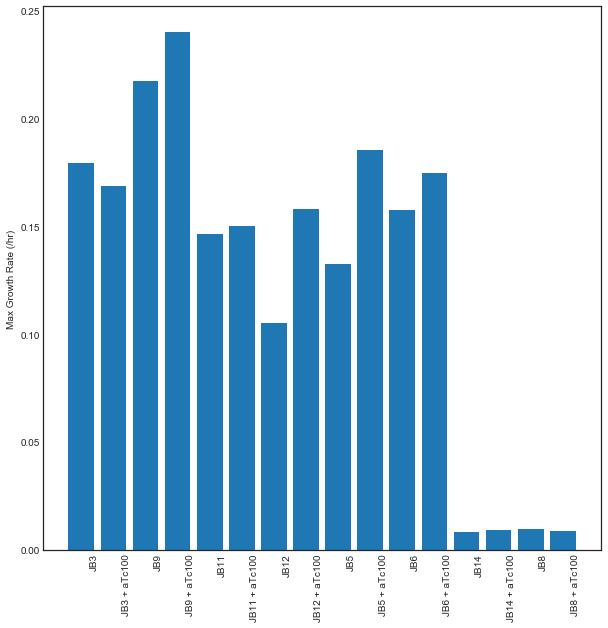

In [11]:
growth_rates = means.MaxGrowthRates(density_label='abs600')

labels = sorted(pos) + sorted(exp) + sorted(neg)
grs = [growth_rates[l] for l in labels]

figure = plt.figure(figsize=(10,10))
xs = np.arange(len(lags))
plt.bar(xs, grs)
plt.ylabel('Max Growth Rate (/hr)')
plt.xticks(xs + 0.4, labels, rotation=90)
plt.show()

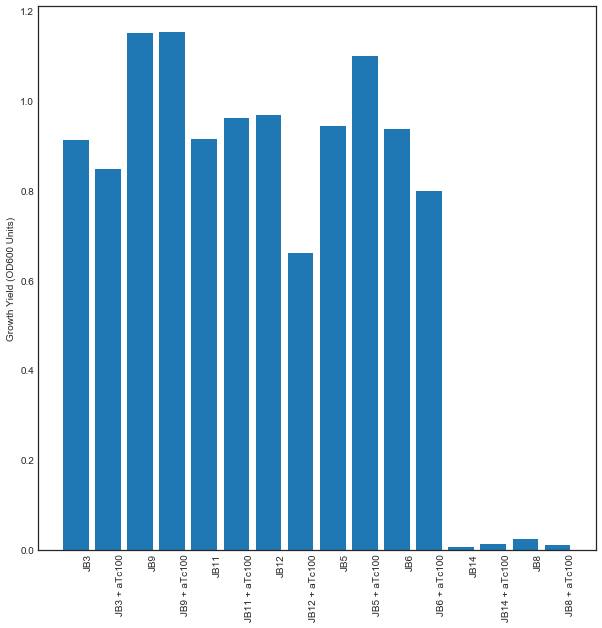

In [12]:
yields = means.GrowthYield(density_label='abs600')

labels = sorted(pos) + sorted(exp) + sorted(neg)
ylds = [yields[l] for l in labels]

figure = plt.figure(figsize=(10,10))
xs = np.arange(len(ylds))
plt.bar(xs, ylds)
plt.ylabel('Growth Yield (OD600 Units)')
plt.xticks(xs + 0.4, labels, rotation=90)
plt.show()